
<h1>Spatial Domain Enhancement Algorithms.</h1>
<h3>Rodrigo Ildefonso Roman Guzman</h3>

# Importación de librerías

In [2]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io
import os
from PIL import Image, ImageOps
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med



/var/folders/r1/bng466016psds6vp1_qcrgk40000gn/T/ipykernel_13204/4102591306.py:8: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
/var/folders/r1/bng466016psds6vp1_qcrgk40000gn/T/ipykernel_13204/4102591306.py:9: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


# Part 1


Exsisten algunos criterios por los que se podría estimar la eficiencia de los algoritmos de detección de bordes. La velocidad de procesamiento, la capacidad de detección de bordes y la robustez frente a ruido son algunos de los factores más comunes.

Según los resultados del trabajo de Nasir et al. (2018), los algoritmos Sobel, Prewitt y Laplaciano en terminos de velocidad de procesamieno y capacidad de detección de bordes. En cuanto a la velocidad, el Laplaciano mostró ser el más veloz, seguido de Prewitt y Sobel. En los resultados de detección de bordes, Solbel fue el mejor seguido por Prewitt y Laplaciano.

Adicionalmente, Gondal et al. (2015) identificaron que Prewitt resulta ser más robusto ante ruido, seguido por Sobel y Laplaciano. 




## Laplacian Filter

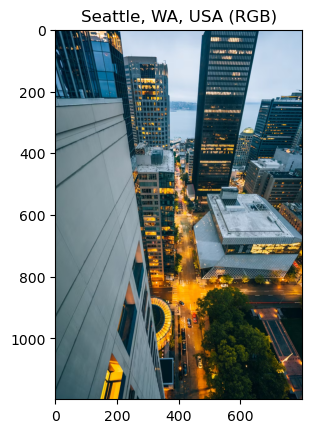

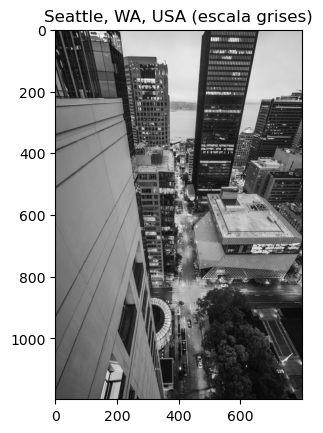

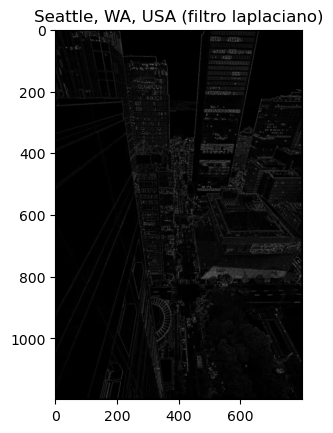

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open image
img = np.array(Image.open("images/city.png")).astype(np.uint8)
plt.title('Seattle, WA, USA (RGB)')
plt.imshow(img, cmap='gray')
plt.show()

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)
plt.title('Seattle, WA, USA (gray scale)')
plt.imshow(gray_img, cmap='gray')
plt.show()

# Define Laplacian operator
h, w = gray_img.shape ## dimensions of the image

# define the mask
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  

# define images
newhorizontalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# Estimate new images
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (kernel[0, 0] * gray_img[i - 1, j - 1]) + \
                         (kernel[0, 1] * gray_img[i - 1, j]) + \
                         (kernel[0, 2] * gray_img[i - 1, j + 1]) + \
                         (kernel[1, 0] * gray_img[i, j - 1]) + \
                         (kernel[1, 1] * gray_img[i, j]) + \
                         (kernel[1, 2] * gray_img[i, j + 1]) + \
                         (kernel[2, 0] * gray_img[i + 1, j - 1]) + \
                         (kernel[2, 1] * gray_img[i + 1, j]) + \
                         (kernel[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        # Border magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('Seattle, WA, USA (laplacian filter)')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

## Sobel


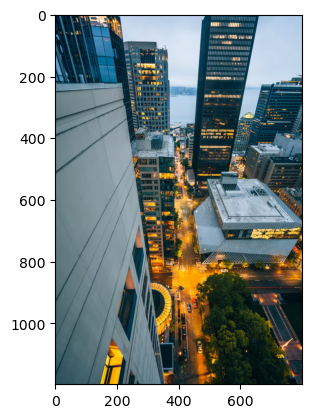

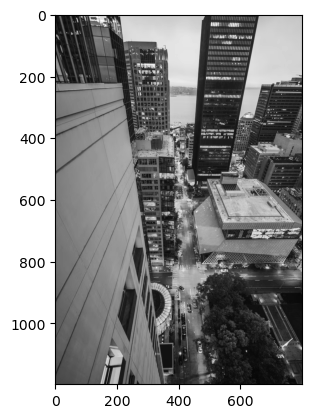

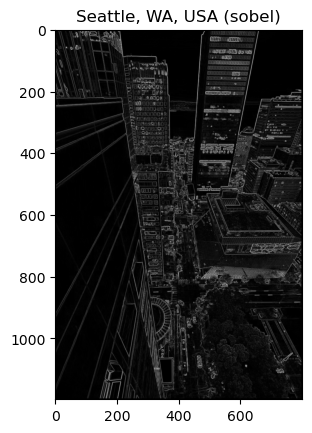

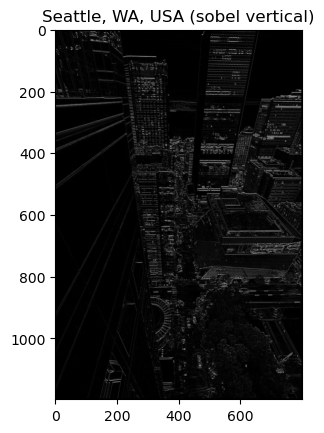

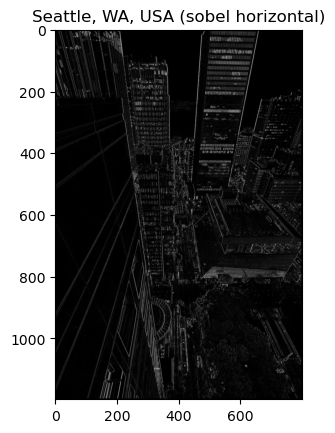

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open image
img = np.array(Image.open("images/city.png")).astype(np.uint8)
plt.imshow(img, cmap='gray')
plt.show()

# Aplply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)
plt.imshow(gray_img, cmap='gray')
plt.show()

# Sobel Operator
h, w = gray_img.shape

# Define the kernels
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# estimación de nueva imagen
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # magnitud de borde
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('Seattle, WA, USA (sobel)')
plt.imshow(newgradientImage, cmap='gray')
plt.show()
plt.title('Seattle, WA, USA (sobel vertical)')
plt.imshow(newverticalImage, cmap='gray')
plt.show()
plt.title('Seattle, WA, USA (sobel horizontal)')
plt.imshow(newhorizontalImage, cmap='gray')
plt.show()

## Prewitt

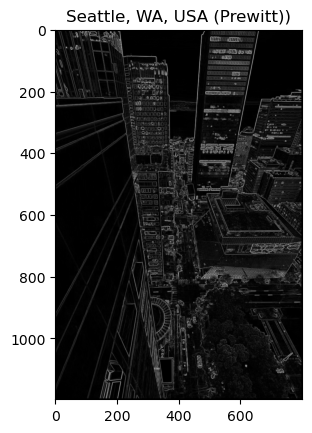

In [9]:
# Open image
img = np.array(Image.open("images/city.png")).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape

# Define the kernels
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# Define image of zeros
newgradientImage = np.zeros((h, w))

# Estimate the new images
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Border magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title('Seattle, WA, USA (Prewitt)')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Part 2

<h4>Unsharp Masking Procedure</h4>
<p>
Unsharp masking is a procedure used to sharpen an image. It is a method that has been used since the darkroom photo development practices. The original image was intentionally blurred to achieve an out-of-focus effect. Afterwards, this blurred image was applied to the original. In image processing, the algorithm is as follows:
</p>
<ol>
<li>
Smooth the image
</li>
<li>
Subtract the smoothed image from the original to obtain the "mask"
</li>
<li>
Add the mask to the original image
</li>
</ol>


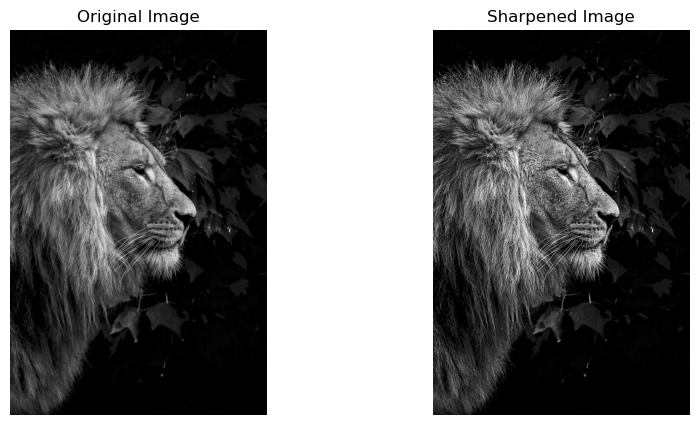

In [61]:


# Load the image
original_image = Image.open('images/lion.png')
image = cv2.imread('images/lion.png', cv2.IMREAD_GRAYSCALE)

# Convert image to float32 for proper handling of mathematical operations
image = image.astype(np.float32)

# Define a function that calculates a Gaussian kernel
def gaussian_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

# Define the function that performs the convolution using separable Gaussian kernels
def gaussConvolutionBlur(img, sigma=3, kernelSize=50):
    gaussKernel = gaussian_kernel(kernelSize, sigma)
    U, S, V = np.linalg.svd(gaussKernel)
    singular_value = S[0]
    horizontalKernel = U[:, 0] * np.sqrt(singular_value)
    verticalKernel = V[0, :] * np.sqrt(singular_value)
    
    padding = kernelSize // 2
    paddingImage = np.pad(img, (padding, padding), mode='reflect')
    convolutedImage = np.zeros_like(img)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            imageWindow = paddingImage[y:y+(2*padding)+1, x:x+(2*padding)+1]
            convolution = np.dot(np.dot(imageWindow, verticalKernel), horizontalKernel)
            convolutedImage[y, x] = convolution

    return convolutedImage

blurredImage = gaussConvolutionBlur(image, 10)
mask = image - blurredImage
weight = 0.8
sharpened = image + (weight * mask)

# Clip values to maintain the 0-255 range and convert to uint8
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.astype(np.uint8), cmap='gray')  # Convert back to uint8 for display
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()



<h4>Compare to Laplacian filter</h4>

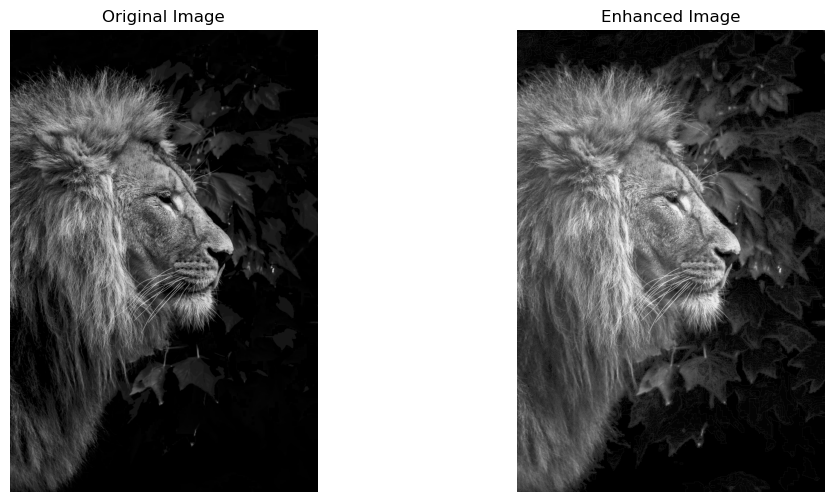

In [63]:


# Convert PIL Image to NumPy array
image = np.array(original_image)  # Convert to numpy array
if image.ndim == 3 and image.shape[2] == 3:  # Check if the image is RGB
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert RGB to BGR

def convolve(img, kernel):
    padding = kernel.shape[0] // 2
    paddingImage = np.pad(img, (padding, padding), mode='reflect')
    convolutedImage = np.zeros_like(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            imageWindow = paddingImage[y:y + (2 * padding) + 1, x:x + (2 * padding) + 1]
            convolutedImage[y, x] = np.sum(kernel * imageWindow)

    return convolutedImage

# Convert to YCrCb color space
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Extract the Y channel (luminance)
Y_channel = ycrcb_image[:, :, 0]

# Define Laplacian kernel for edge enhancement
laplacianKernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplacian = convolve(Y_channel, laplacianKernel)

# Normalize the Laplacian output
laplacian_normalized = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Add the Laplacian back to the original Y channel with a weight for sharpening
weight = 0.3  # This can be adjusted
sharpened_Y = cv2.addWeighted(Y_channel, 1, laplacian_normalized, weight, 0)

# Replace the Y channel in the YCrCb image with the sharpened version
ycrcb_image[:, :, 0] = sharpened_Y

# Convert BGR to RGB for displaying with matplotlib
final_rgb_image = cv2.cvtColor(sharpened_Y, cv2.COLOR_BGR2RGB)

org_image = cv2.imread('images/lion.png', cv2.IMREAD_GRAYSCALE)

# Display the original (also convert to RGB) and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(org_image.astype(np.uint8), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_rgb_image)  # Already converted to RGB
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

# Part 3 

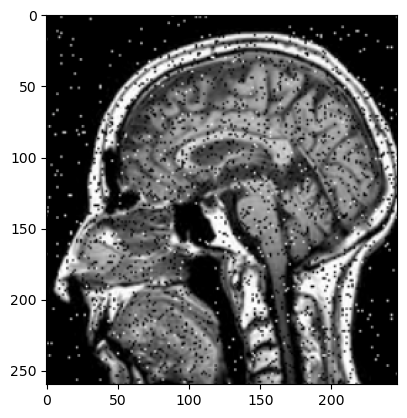

In [49]:
original_image = Image.open('images/salt-pepper-noise.png')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('img.npy', original_image)

#Load the image
original_image = np.load('img.npy')

Text(0.5, 1.0, 'Median filter')

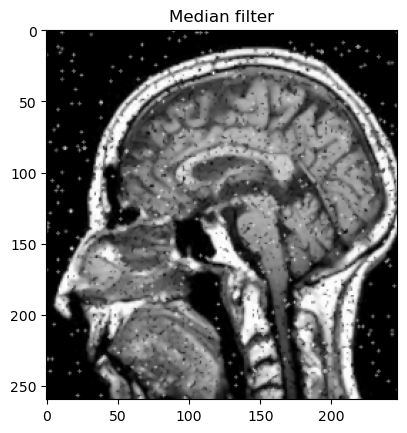

In [50]:
# Apply median filter

img_med = med(original_image, size=2)
plt.imshow(img_med)
plt.title('Median filter')

Text(0.5, 1.0, 'Gaussian filter')

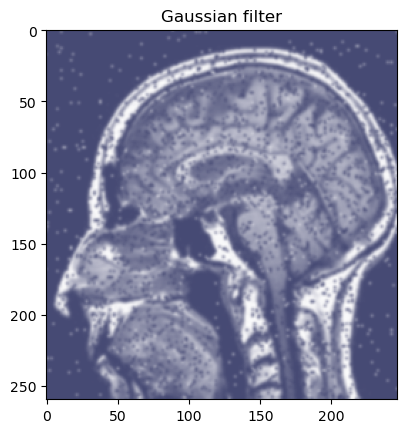

In [54]:
# apply gaussian filter
img3_gauss = gauss(original_image, sigma=0.8)   
plt.imshow(img3_gauss)
plt.title('Gaussian filter')

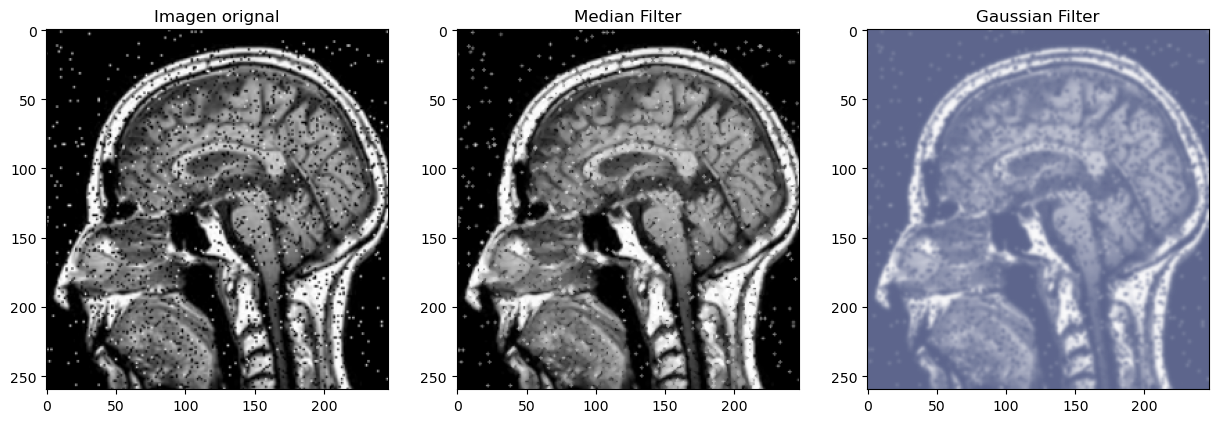

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(original_image)
axs[0].set_title('Imagen orignal')
axs[1].imshow(img_med)
axs[1].set_title('Median Filter')
axs[2].imshow(img3_gauss)
axs[2].set_title('Gaussian Filter')
plt.show()

### Domain Spatial Filtering

#### Steps



1.   Import the image in grayscale.
2.   Transform the image to a frequency domain using the Fourier transform:

      F(u,v) = F{f(x,y)}
3.   Multiply by the filter H(u,v)
     G(u,v) = F(u,v)* H(u,v)

4.   Obtain the inverse of the Fourier transform:
     g(x,y) = F\-1 {G(u,v)}


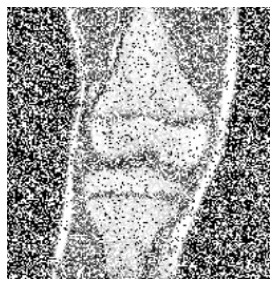

In [ ]:
# open image

f = cv2.imread('/content/drive/MyDrive/VisionImagenes-Grupo9/Semana3/pet-salt-pepper-noise.png', 0)

# show image
plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

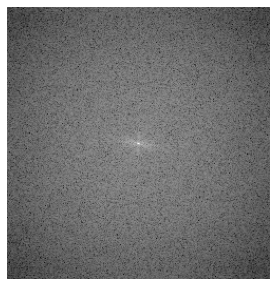

In [ ]:
# transform image to frecuency domain

F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

# show image in frecuency domain
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

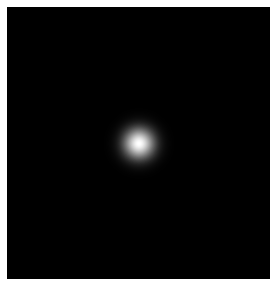

In [ ]:
# create a Gussian filter: low pass filter

M, N = f.shape
H = np.zeros((M, N), dtype=np.float32)

D0 = 10 # cut-off frecuency
for i in range(M):
    for j in range(N):
        D = np.sqrt((i - M/2)**2 + (j - N/2)**2)
        H[i, j] = np.exp(-D**2 / (2 * D0**2))

# show filter
plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

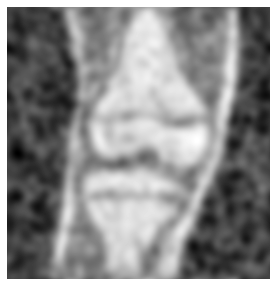

In [ ]:
# apply image filter 

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

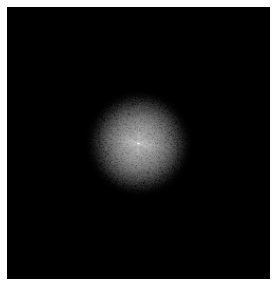

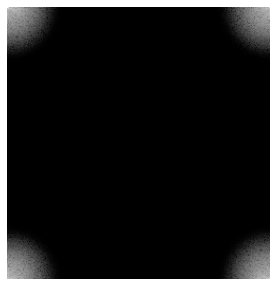

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

#### Gussian Filter: High Pass Filter

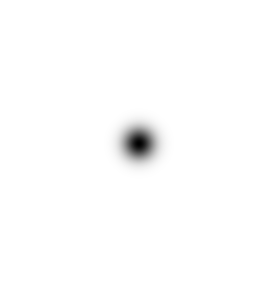

In [ ]:
# Gusssian filter: high pass filter

HPF = 1 - H

# show filter
plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

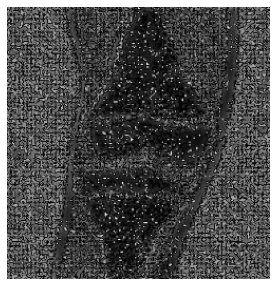

In [ ]:
# image filter

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g2 = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g2, cmap='gray')

plt.axis('off')
plt.show()


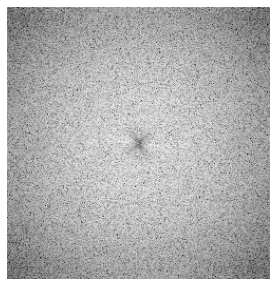

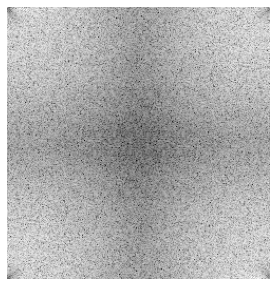

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

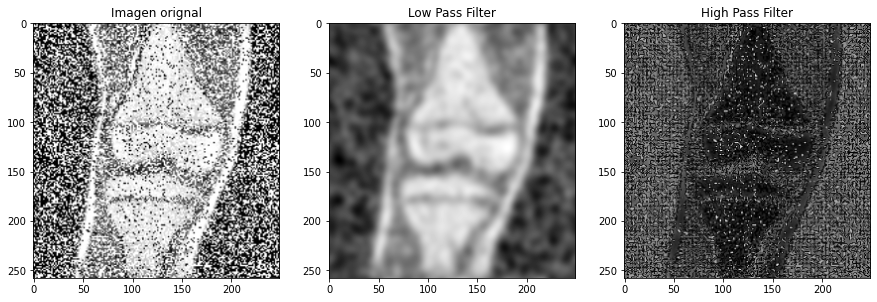

In [ ]:
# compare original image and filtered image
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Orignal')
axs[1].imshow(g, cmap='gray')
axs[1].set_title('Low Pass Filter')
axs[2].imshow(g2, cmap='gray')
axs[2].set_title('High Pass Filter')
plt.show()


### Bibliography

* Gonzalez, R. C., Woods, R. E. (2008). Digital image processing. Upper Saddle River, N.J.: Prentice Hall. ISBN: 9780131687288 013168728X 9780135052679 013505267X
*  Lowpass Gaussian Filter, Recovered, 26 de enero 2023, https://www.nanophys.kth.se/nanolab/afm/icon/bruker-help/Content/SoftwareGuide/Offline/ModifyCommands/Gaussian.htm


* Gondal, I., Nasir, M., & Qureshi, T. (2015). A comparative study of Sobel, Prewitt and Laplacian edge detection techniques against salt and pepper noise. International Journal of Image, Graphics and Signal Processing, 7(5), 34-40.


* Chandra, B. (2020, abril 21). A beginners guide to computer vision (part 2)- edge detection. Analytics Vidhya. https://medium.com/analytics-vidhya/a-beginners-guide-to-computer-vision-part-2-edge-detection-4f10777d5483

* Dougherty, A. (2020, noviembre 11). Magic of the Sobel Operator. Towards Data Science. https://towardsdatascience.com/magic-of-the-sobel-operator-bbbcb15af20d

* Nasir, M., Gondal, I., & Qureshi, T. (2018). A comparative study of Sobel, Prewitt and Laplacian edge detection techniques. International Journal of Emerging Technologies in Computational and Applied Sciences (IJETCAS), 8(2), 15-18.

* Tsankashvili, N. (2018, enero 20). Comparing edge detection methods - Nika tsankashvili. Medium. https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e


